In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
!ls /content/drive/MyDrive/

 Cell_Phones_Sampled.csv      Photos
'Colab Notebooks'	     'Ruchi '
 master_dataset_airline.csv  'tsystems certificate.pdf'


In [17]:
# df1v=pd.read_csv('master_dataset_airline.csv')

In [18]:
dataset_path = '/content/drive/MyDrive/master_dataset_airline.csv'


In [19]:
df = pd.read_csv(dataset_path)

In [20]:
print(df.shape)
df.head()

(217385, 12)


,airline,customer_review,recommended,sentiment,language,user_id,gender,age,travel_class,satisfaction,date_time,is_booking
0,Aer Lingus,DUB-MAL. Flew to Malaga recently and overall v...,yes,1,en,user_0,Male,23,Economy,Neutral or Dissatisfied,2014-06-12 17:49:40,0
1,Thai Airways,TG 911 30th Jan 2015. Inbound flight TG916 on ...,no,0,en,user_1,Male,38,Economy,Satisfied,2014-01-14 22:43:20,0
2,United Airlines,Trip Verified | Columbia to Tokyo via Denver....,no,0,en,user_2,Male,33,Business,Satisfied,2014-07-11 10:58:21,0
3,flydubai,Flydubai to and from Port Sudan. Both flights ...,yes,1,en,user_3,Male,68,Economy,Satisfied,2013-09-17 05:06:11,0
4,Etihad Airways,Flew MEL-AUH-DUB. Booked business and got unex...,yes,1,en,user_4,Male,27,Business,Satisfied,2014-07-09 17:55:09,1


In [21]:
print(df.columns)

Index(['airline', 'customer_review', 'recommended', 'sentiment', 'language',
       'user_id', 'gender', 'age', 'travel_class', 'satisfaction', 'date_time',
       'is_booking'],
      dtype='object')


In [22]:
print(df.info)

<bound method DataFrame.info of                 airline                                    customer_review  \
0            Aer Lingus  DUB-MAL. Flew to Malaga recently and overall v...   
1          Thai Airways  TG 911 30th Jan 2015. Inbound flight TG916 on ...   
2       United Airlines   Trip Verified | Columbia to Tokyo via Denver....   
3              flydubai  Flydubai to and from Port Sudan. Both flights ...   
4        Etihad Airways  Flew MEL-AUH-DUB. Booked business and got unex...   
...                 ...                                                ...   
217380    Qatar Airways  Il volo con KLM è stato eccellente. La consiglio.   
217381        Lufthansa  Il volo con KLM è stato eccellente. Volerei di...   
217382       Air France  Air France offre un servizio eccellente. Voler...   
217383    Qatar Airways  Il volo con Lufthansa è stato discreto. La con...   
217384        Lufthansa  Il volo con Lufthansa è stato discreto. Volere...   

       recommended  sentiment l

In [23]:
print(df.isnull().sum())

airline            0
customer_review    0
recommended        0
sentiment          0
language           0
user_id            0
gender             0
age                0
travel_class       0
satisfaction       0
date_time          0
is_booking         0
dtype: int64


<Axes: xlabel='language'>

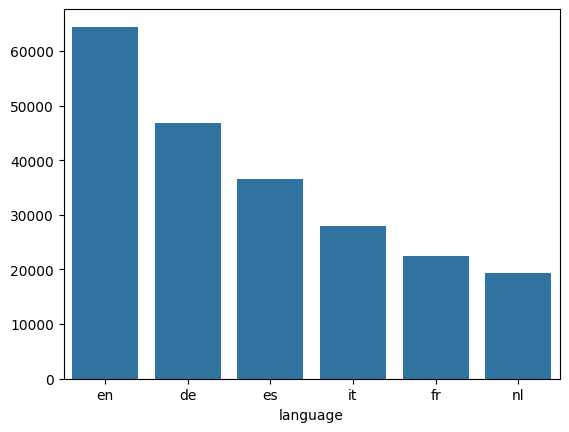

In [24]:
#language distribution
lang_counts = df['language'].value_counts()
sns.barplot(x=lang_counts.index, y=lang_counts.values)


/tmp/ipython-input-25-1337311524.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='pastel')


<Axes: xlabel='sentiment', ylabel='count'>

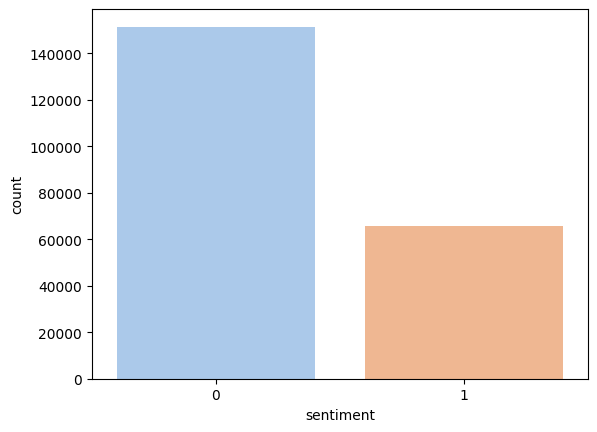

In [25]:
#sentiment distribution
sns.countplot(data=df, x='sentiment', palette='pastel')


/tmp/ipython-input-26-561752794.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='is_booking', palette='Set2')


<Axes: xlabel='is_booking', ylabel='count'>

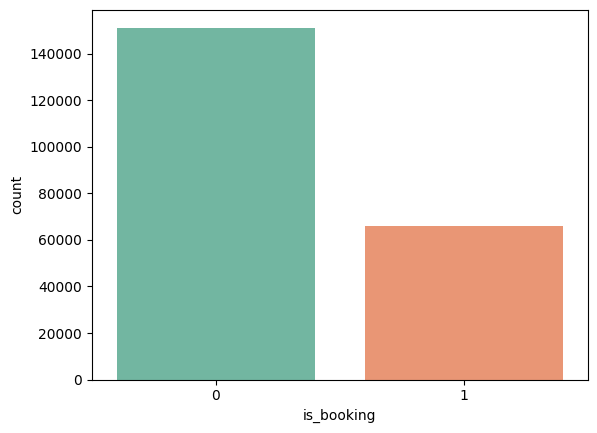

In [26]:
#booking distribution
sns.countplot(data=df, x='is_booking', palette='Set2')


<Axes: xlabel='satisfaction', ylabel='count'>

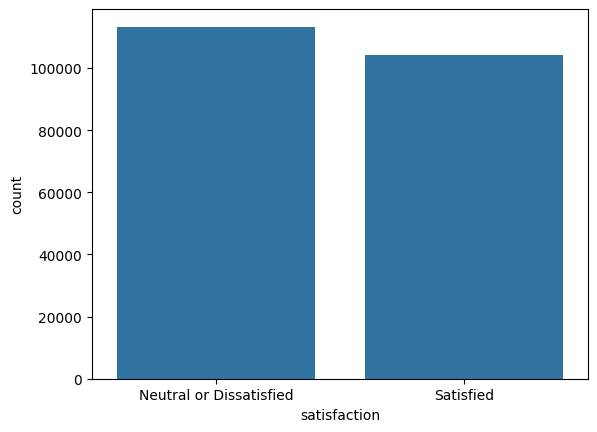

In [27]:
#satisfaction level
sns.countplot(data=df, x='satisfaction', order=df['satisfaction'].value_counts().index)


<Axes: xlabel='travel_class', ylabel='count'>

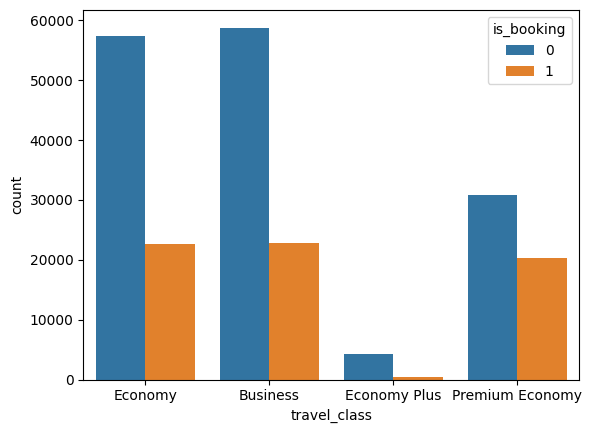

In [28]:
#travel class vs booking
sns.countplot(data=df, x='travel_class', hue='is_booking')


<Axes: xlabel='age', ylabel='Count'>

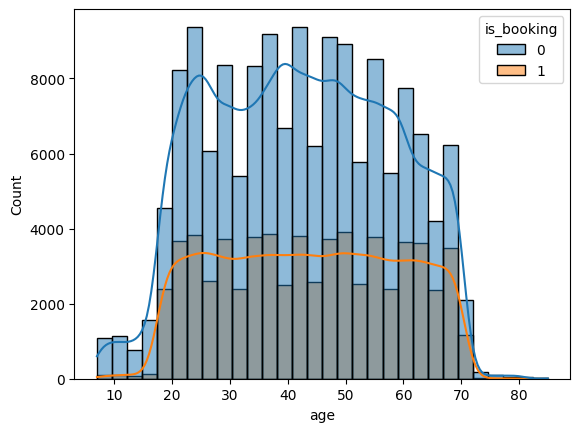

In [29]:
#age distribution while booking
sns.histplot(data=df, x='age', hue='is_booking', bins=30, kde=True)


<Axes: >

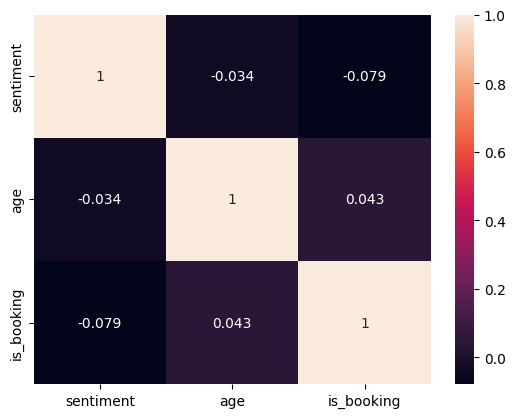

In [30]:
#correlation heatmap
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)



In [31]:
print("Before SMOTE - Class distribution:\n", df['is_booking'].value_counts())

Before SMOTE - Class distribution:
 is_booking
0    151235
1     66150
Name: count, dtype: int64


In [32]:
# Encoding the 'recommended' column to numeric
df['recommended'] = df['recommended'].map({'yes': 1, 'no': 0})


In [33]:
categorical_cols = ['gender', 'travel_class', 'satisfaction', 'language', 'airline']

le_dict = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    le_dict[col] = le  # Save encoder for future use


In [34]:
X = df.drop(columns=['is_booking', 'user_id', 'customer_review', 'date_time'])  # Droping non-numeric
y = df['is_booking']


In [35]:
categorical_cols = ['gender', 'travel_class', 'satisfaction', 'language']

# Label encoding for simplicity (you can use OneHotEncoding for more accuracy later)
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))


In [36]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

print("SMOTE Successful!")
print("After SMOTE:\n", pd.Series(y_train_resampled).value_counts())

SMOTE Successful!
After SMOTE:
 is_booking
0    121101
1    121101
Name: count, dtype: int64



 Logistic Regression
Accuracy: 0.5620672999516986
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.56      0.64     30134
           1       0.36      0.56      0.44     13343

    accuracy                           0.56     43477
   macro avg       0.55      0.56      0.54     43477
weighted avg       0.63      0.56      0.58     43477



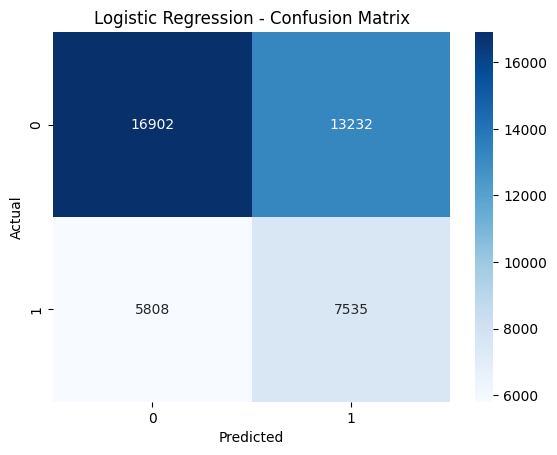


 Random Forest
Accuracy: 0.5953262644616694
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.64      0.69     30134
           1       0.38      0.50      0.43     13343

    accuracy                           0.60     43477
   macro avg       0.56      0.57      0.56     43477
weighted avg       0.63      0.60      0.61     43477



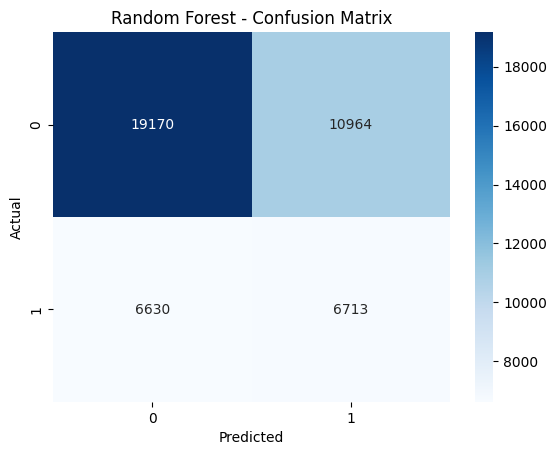


 Support Vector Machine
Accuracy: 0.5644593693217104
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.45      0.59     30134
           1       0.40      0.83      0.54     13343

    accuracy                           0.56     43477
   macro avg       0.63      0.64      0.56     43477
weighted avg       0.72      0.56      0.57     43477



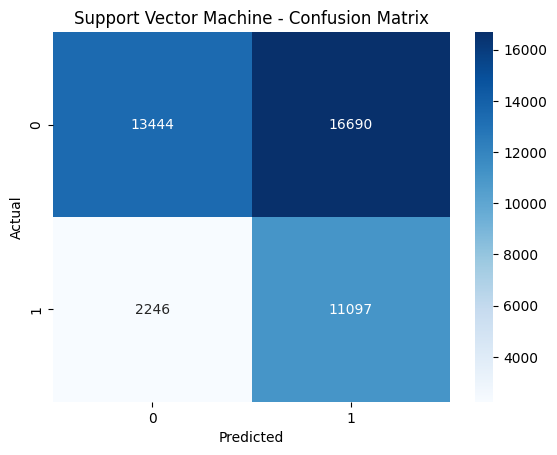


 K-Nearest Neighbors
Accuracy: 0.6110817213699197
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.69      0.71     30134
           1       0.38      0.44      0.41     13343

    accuracy                           0.61     43477
   macro avg       0.56      0.56      0.56     43477
weighted avg       0.63      0.61      0.62     43477



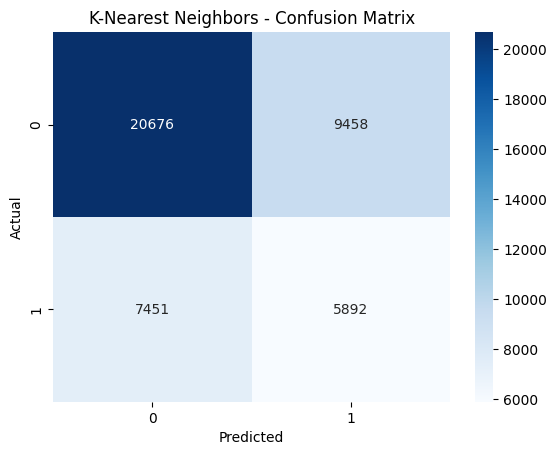

In [38]:
# scale features for SVM/KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Defining models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}
model_predictions = {}
# Train and evaluate
for name, model in models.items():
    print(f"\n {name}")
    model.fit(X_train_scaled, y_train_resampled)
    y_pred = model.predict(X_test_scaled)
    model_predictions[name] = y_pred


    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Create results list
results = []
for name, y_pred in model_predictions.items():
    results.append({
        "Model": name,
        "Accuracy": round(accuracy_score(y_test, y_pred), 4),
        "Precision": round(precision_score(y_test, y_pred), 4),
        "Recall": round(recall_score(y_test, y_pred), 4),
        "F1 Score": round(f1_score(y_test, y_pred), 4),
    })

# Create DataFrame
summary_df = pd.DataFrame(results)
summary_df


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.5621,0.3628,0.5647,0.4418
1,Random Forest,0.5953,0.3798,0.5031,0.4328
2,Support Vector Machine,0.5645,0.3994,0.8317,0.5396
3,K-Nearest Neighbors,0.6111,0.3838,0.4416,0.4107


In [43]:
# Extract predictions from stored dictionary
y_pred_Knn = model_predictions["K-Nearest Neighbors"]

# Calculate booking statistics
num_predicted_bookings = np.sum(y_pred_Knn)
total_customers = len(y_pred_Knn)
percent_predicted_bookings = (num_predicted_bookings / total_customers) * 100

print(f" Predicted Bookings: {num_predicted_bookings} out of {total_customers}")
print(f" Percentage Likely to Book: {percent_predicted_bookings:.2f}%")

 Predicted Bookings: 15350 out of 43477
 Percentage Likely to Book: 35.31%


In [44]:
# Input: a new customer
manual_input = {
    'age': 32,
    'gender': 'Male',
    'travel_class': 'Economy',
    'satisfaction': 'Satisfied',
    'airline': 'Delta Air Lines',
    'sentiment': 1  # 1 for positive sentiment
}


In [45]:
# Create a DataFrame
manual_df = pd.DataFrame([manual_input])

# One-hot encode the manual input
manual_encoded = pd.get_dummies(manual_df)

# Align the manual input columns with training data
# This fills missing columns with 0, and drops extras
manual_encoded = manual_encoded.reindex(columns=X_train.columns, fill_value=0)

# Scaling the features
manual_scaled = scaler.transform(manual_encoded)

# Predict using trained model
prediction = models["K-Nearest Neighbors"].predict(manual_scaled)

print("Booking Likelihood:", "Will Book" if prediction[0] == 1 else "Will Not Book")

Booking Likelihood: Will Book
